# 1 Delaunay


Assumptions:
<ol>
<li> Symmetric horizontal flight: heading can only change along z/axis (yaw), therefore objects are all placed along the x-y plane (z = 0), so the simulation is reduced to 2D.</li>
<li> Trajectory path calculated according to midpoints of delaunay triangles (basis for Voronoi diagrams).</li>
<li> The radius of the objects is taken into account. The gab between two obstacles and the midpoints are calculated accordingly </li>
<li> In order to prevent obstacles to overlap a constraint is set on min distance between objects, and max radius. Equally, a constraint has to be set on  the beginning position, such that it does not start at the location of a particular interference. 



In [1]:
import numpy as np
import matplotlib.pylab as plt
import time 
%matplotlib inline
import pickle
import scipy 
from scipy.spatial import Delaunay
from numpy import linalg as LA
import matplotlib.pyplot as plt
from graphics import *
#win = GraphWin()
#win.close()

In [2]:
#Load obstaclesm position and heading

with open('initialVariables.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    position, __ , heading = pickle.load(f)
with open('obsRotated.pickle', 'rb') as f:  # Python 3: open(..., 'rb')
    obstacles, __ = pickle.load(f)

In [3]:

points = np.array(obstacles[:,0:2])
p = position[0:2]
r = obstacles [:,3]


tri = Delaunay(points)
median = points[tri.simplices]

In [4]:
head = np.array([np.cos(heading), np.sin(heading)])

#x,y,u,v = np.hstack([position[0:2], head[0], head[1]])


In [5]:
# fig, ax = plt.subplots()
# limits = 10
# ax.set_xlim((-limits, limits))
# ax.set_ylim((-limits, limits))
# for c in obstacles:
#     #print(c)
#     point =(c[0],c[1])
#     circle = plt.Circle(point, c[3], color='r')
#     ax.add_artist(circle)
# circle = plt.Circle((position[0],position[1]), 0.2, color='b')
# ax.add_artist(circle)

# #vec1 = np.multiply(np.ones_like(heading[0:2]),position[0:2])
# # vec1 = np.hstack([position[0:2], head[0], head[1]])
# # vec1 =np.array([1,1,1,1])
# # X, Y, U, V = zip(*vec1)
# X,Y,U,V = np.hstack([position[0:2], head[0], head[1]])
# ax = plt.gca()
# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color= 'b')

In [6]:
triangle_index = tri.find_simplex(p)


In [7]:
#tri.plane_distance(p)

In [8]:
p

array([0, 1])

In [9]:
points_index = points[tri.simplices[triangle_index]]
#tri.simplices[triangle_index]
radius_index = r[tri.simplices[triangle_index]]
rads= np.hstack([radius_index, radius_index[0]])
base = np.vstack([points_index, points_index[0]])
base

array([[ -1.19618781,  10.22590508],
       [ -0.45579228,  -2.7914608 ],
       [  7.56256913,  -1.95129398],
       [ -1.19618781,  10.22590508]])

In [10]:
median =np.array([ [
                     base[i], #0 first point [x,y]
                     base[i+1], #1 next point [x,y]
                    LA.norm(   #2 gap with radius scalar
                        np.add(base[i],
                            np.multiply(rads[i],
                                    np.divide(([base[i+1]-base[i]]),
                                             LA.norm([base[i+1]-base[i]]))))
                            -
                        np.add(base[i+1],
                        np.multiply(-rads[i+1],
                                    np.divide(([base[i+1]-base[i]]),
                                             LA.norm([base[i+1]-base[i]]))))),
                    LA.norm([base[i]- base[i+1]]), #3 gap without radius, scalar
                    (np.add(base[i], # 4 midpoint with radius
                            np.multiply(rads[i],
                                    np.divide(([base[i+1]-base[i]]),
                                             LA.norm([base[i+1]-base[i]]))))
                                +
                        np.add(base[i+1],
                        np.multiply(-rads[i+1],
                                    np.divide(([base[i+1]-base[i]]),
                                             LA.norm([base[i+1]-base[i]])))))/2,
                    (base[i]+base[i+1])/2 #5 midpoint without radius
            
                  
                   ]

                  for i in range(len(points_index)) ])
median

array([[array([ -1.19618781,  10.22590508]),
        array([-0.45579228, -2.7914608 ]), 11.974596972032582,
        13.038404810405298, array([[-0.8519912 ,  4.17436511]]),
        array([-0.82599004,  3.71722214])],
       [array([-0.45579228, -2.7914608 ]),
        array([ 7.56256913, -1.95129398]), 6.0766804452325998,
        8.0622577482985491, array([[ 3.55040185, -2.37169032]]),
        array([ 3.55338842, -2.37137739])],
       [array([ 7.56256913, -1.95129398]),
        array([ -1.19618781,  10.22590508]), 13.93018632461729, 15.0,
        array([[ 2.91407217,  4.51145789]]),
        array([ 3.18319066,  4.13730555])]], dtype=object)

3
(1, 2)
4.17436511115 [[-0.8519912   4.17436511]]
(1, 2)
-2.37169032349 [[ 3.55040185 -2.37169032]]
(1, 2)
4.51145789258 [[ 2.91407217  4.51145789]]


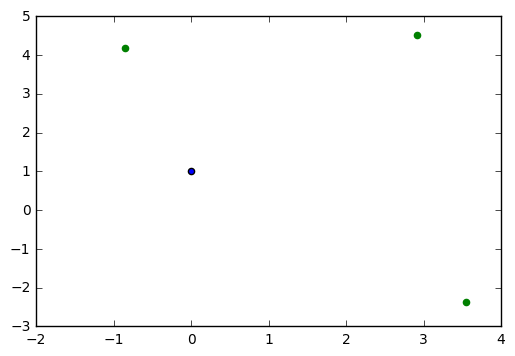

In [11]:

scat = median[:,4]
print(len(scat))
for i in scat:
    print (i.shape)
    print(i[0][1], i)
    x = i[0][0]
    y = i[0][1]

coordinates = np.array([[i[0][0],i[0][1]]for i in scat])
plt.scatter(coordinates[:,0], coordinates[:,1], color = 'g')
plt.scatter(position[0], position[1])
#plt.scatter(scat[:,0],scat[:,1])

In [12]:
# np.amax(median, axis=1)
#np.add([1,2],[3,4])
np.cos(np.arctan(-2/1))

0.44721359549995804

In [13]:

winner_index =median[np.argmax(median[:,2])]
dx_dy = winner_index[4]-p
psi = np.arctan(dx_dy[0][1]/dx_dy[0][0])
print(dx_dy, p,winner_index[4],psi*180/np.pi)
new_heading = psi-heading
new_head = [np.cos(new_heading), np.sin(new_heading)]
print(new_heading*180/np.pi, heading*180/np.pi)
psi
#dx_dy[0][0]


xvector = [1,0]
psi = np.arccos(np.dot(dx_dy, xvector)/np.dot(LA.norm(dx_dy), LA.norm(xvector)))#*180/np.pi
new_heading =- np.arccos(np.dot(dx_dy, head)/np.dot(LA.norm(dx_dy), LA.norm(head)))#*180/np.pi
new_head = [np.cos(new_heading), np.sin(new_heading)]
print(psi, new_heading)

[[ 2.91407217  3.51145789]] [0 1] [[ 2.91407217  4.51145789]] 50.3115575562
[-93.96191553] [ 144.27347308]
[ 0.87810233] [[-1.6399448]]


3
(1, 2)
4.17436511115 [[-0.8519912   4.17436511]]
(1, 2)
-2.37169032349 [[ 3.55040185 -2.37169032]]
(1, 2)
4.51145789258 [[ 2.91407217  4.51145789]]


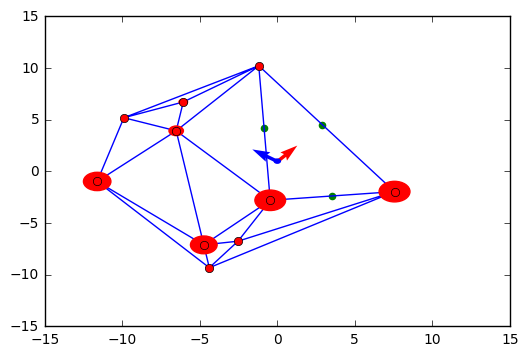

In [19]:
fig, ax = plt.subplots()
limits = 15
ax.set_xlim((-limits, limits))
ax.set_ylim((-limits, limits))
for c in obstacles:
    #print(c)
    point =(c[0],c[1])
    circle = plt.Circle(point, c[3], color='r')
    ax.add_artist(circle)
circle = plt.Circle((position[0],position[1]), 0.2, color='b')
ax.add_artist(circle)

#vec1 = np.multiply(np.ones_like(heading[0:2]),position[0:2])
# vec1 = np.hstack([position[0:2], head[0], head[1]])
# vec1 =np.array([1,1,1,1])
# X, Y, U, V = zip(*vec1)
X,Y,U,V = np.hstack([position[0:2], head[0], head[1]])
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color= 'b')

# X,Y,U,V = np.hstack([position [0:2],np.cos(new_heading[0]), np.sin(new_heading[0])])
# ax = plt.gca()
# ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color= 'g')
X,Y,U,V = np.hstack([position [0:2],np.cos(psi), np.sin(psi)])
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=0.5, color= 'r')
scat = median[:,4]
print(len(scat))
for i in scat:
    print (i.shape)
    print(i[0][1], i)
    x = i[0][0]
    y = i[0][1]

coordinates = np.array([[i[0][0],i[0][1]]for i in scat])
plt.scatter(coordinates[:,0], coordinates[:,1], color = 'g')


plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')

In [15]:
# import matplotlib.delaunay as triang
# import pylab
# import numpy
# from numpy import linalg as LA

# # 10 random points (x,y) in the plane
# x,y =  numpy.array(numpy.random.standard_normal((2,10)))
# cens,edg,tri,neig = triang.delaunay(x,y)

# for t in tri:
#  # t[0], t[1], t[2] are the points indexes of the triangle
#  t_i = [t[0], t[1], t[2], t[0]]
#  pylab.plot(x[t_i],y[t_i])

# pylab.plot(x,y,'o')
# pylab.show()
#print(x, y, tri, neig)

In [16]:

# points = np.array([[0,0], [0,10],[4,5], [11,-5]])
# r = np.array([0.2,0.5,0.3,0.6])
# r = np.ones(4)*0.5
# tri = Delaunay(points)
# median = points[tri.simplices]
# plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
# plt.plot(points[:,0], points[:,1], 'o')
# r

In [17]:
# triangle_index = tri.find_simplex(p)
# points_index = points[tri.simplices[triangle_index]]
# #tri.simplices[triangle_index]
# radius_index = r[tri.simplices[triangle_index]]
# rads= np.hstack([radius_index, radius_index[0]])
# base = np.vstack([points_index, points_index[0]])

In [18]:


# # for i in range(len(points_index)):
# #     median= (base[i]+base[i+1])/2
# #     print (base[i], base[i+1], median)
    
# median =np.array([ [(base[i]+base[i+1]), 
#                     rads[i]-rads[i+1],
#                     #norm new
#                     LA.norm(np.add([base[i],base[i+1]],np.multiply([rads[i], -rads[i+1]],np.divide(([base[i+1]-base[i]]),LA.norm([base[i+1]-base[i]]))))),
#                     # R times V/V
#                     np.multiply([rads[i], -rads[i+1]],np.divide(([base[i+1]-base[i]]),LA.norm([base[i+1]-base[i]]))),
#                     # Normalised vector
#                     np.divide(([base[i+1]-base[i]]),LA.norm([base[i+1]-base[i]])),
#                     # Vector 
#                     [base[i+1]-base[i]],
#                     # New midpoint
#                     np.divide(base[i]+base[i+1]+np.multiply((rads[i]-rads[i+1]),np.divide(([base[i+1]-base[i]]),LA.norm([base[i+1]-base[i]]))),2),
#                     LA.norm([base[i+1]- base[i]])] 
#                   for i in range(len(points_index)) ])
# median